In [1]:
import pandas as pd

file_path_csv1 = "C:\\Users\\shadm\\Downloads\\statistic_session_215.csv"
file_path_csv2 = "C:\\Users\\shadm\\Downloads\\position_session_215.csv"


data1 = pd.read_csv(file_path_csv1)
data2 = pd.read_csv(file_path_csv2)


merged_data = pd.merge(data1, data2, on='timestamp', how='inner')


merged_data.sort_values(by=['player_id', 'timestamp'], inplace=True)


columns_to_delete = ['speed', 'distance', 'timestamp', 'session_id', 'session', 'x', 'y', 'tag_id.1']
merged_data.drop(columns=columns_to_delete, inplace=True)


merged_data['speed_soft'] = (merged_data['speed_soft'] * 3.6).round(3)
merged_data['top_speed'] = (merged_data['top_speed'] * 3.6).round(3)


merged_data['player_weight'] = 38


merged_data['power_output'] = (merged_data['player_weight'] * merged_data['speed_soft'] * 1.04).round(3)


file_path_modified_merged_excel = "C:\\Users\\shadm\\Downloads\\modified_merged_215.xlsx"


print(merged_data)

merged_data.to_excel(file_path_modified_merged_excel, index=False)

print(f"Successful: {file_path_modified_merged_excel}")


          id_x  player_id  speed_soft  distance_soft  acceleration  \
10      373382          3       0.000       0.000000             0   
18      373392          3       0.000       0.000000             0   
30      373401          3       0.000       0.000000             0   
66      373410          3       0.000       0.000000             0   
77      373416          3       0.000       0.000000             0   
...        ...        ...         ...            ...           ...   
417073  776543         53       5.831    7712.104148           128   
417075  776583         53       5.729    7712.304679           128   
417080  776584         53       5.635    7712.348304           128   
417082  776585         53       5.491    7712.624150           128   
417085  776586         53       5.739    7713.018992           128   

        deceleration  top_speed    tag_id_x    id_y  tag_id_y  \
10                 0      0.000  2250000024  374167        58   
18                 0      0.0

In [2]:
file_path_modified_merged_excel = "C:\\Users\\shadm\\Downloads\\modified_merged_215.xlsx"
merged_data = pd.read_excel(file_path_modified_merged_excel)


overall_session_data = merged_data.groupby('player_id').agg(
    total_time=('twr_timestamp', 'last'),
    top_speed=('top_speed', 'max'),
    acceleration_numbers=('acceleration', 'last'),
    deceleration_numbers=('deceleration', 'last'),
    speed_exceeded_20=('speed_soft', lambda x: (x > 20).sum()),
    total_distance=('distance_soft', 'last'),
    powerplay_count=('power_output', lambda x: (x > 500).sum())
)


print(overall_session_data)


output_file_path = "C:\\Users\\shadm\\Downloads\\overall_session_data_215.xlsx" # Provide the desired path
overall_session_data.to_excel(output_file_path, index=True)
print(f"Data saved to {output_file_path}")


                           total_time  top_speed  acceleration_numbers  \
player_id                                                                
3          2024-01-17 15:28:21.334+00     27.925                   141   
9          2024-01-17 15:28:35.327+00     29.222                   158   
11         2024-01-17 15:28:38.127+00     29.223                   134   
14         2024-01-17 15:28:37.468+00     26.906                   168   
17         2024-01-17 15:28:28.911+00     37.036                   155   
23         2024-01-17 15:27:55.679+00     28.557                   167   
25         2024-01-17 15:28:37.598+00     34.469                   121   
26         2024-01-17 15:28:35.074+00     26.670                    96   
29         2024-01-17 15:28:24.742+00     37.652                   131   
38         2024-01-17 15:28:24.488+00     30.401                   157   
40         2024-01-17 15:28:23.137+00     27.092                   143   
41         2024-01-17 15:28:35.761+00 

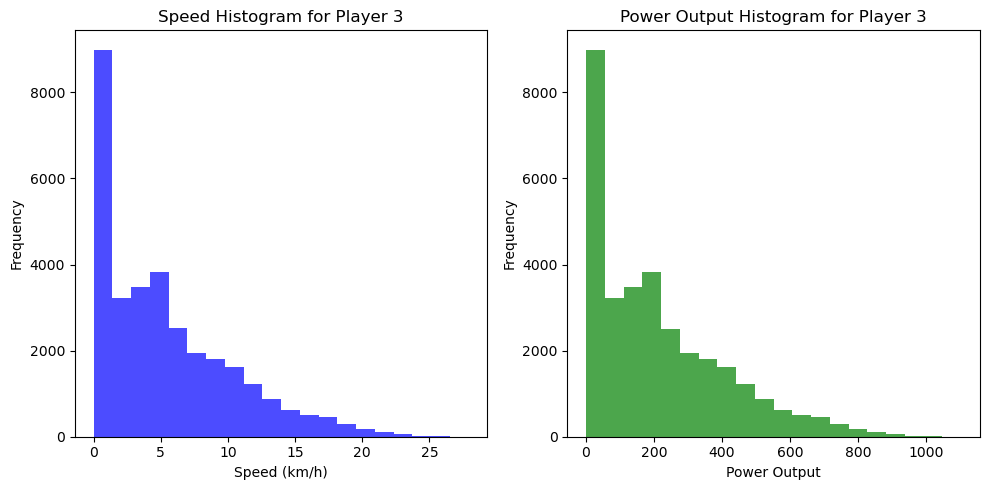

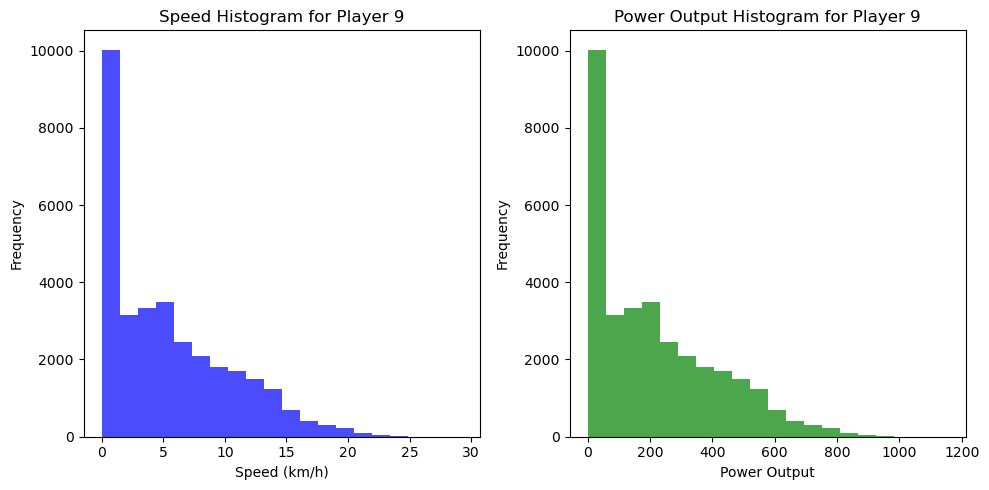

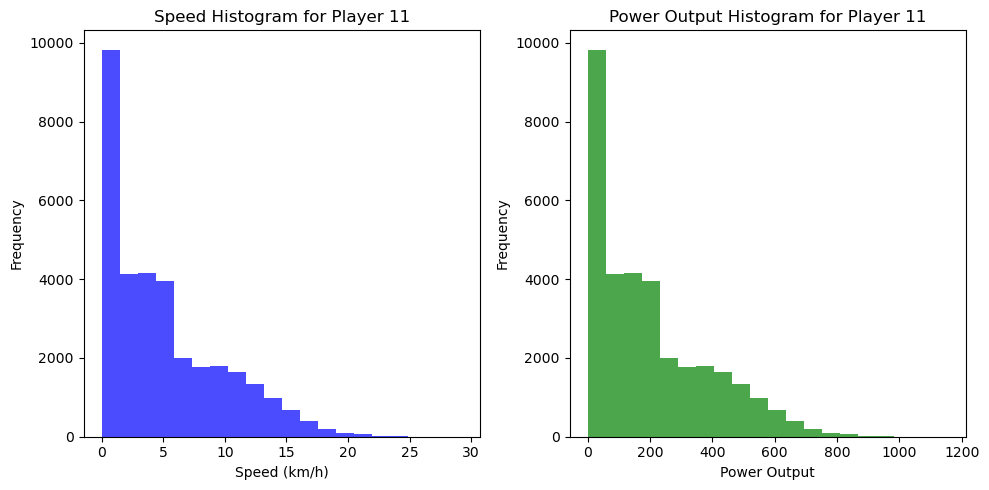

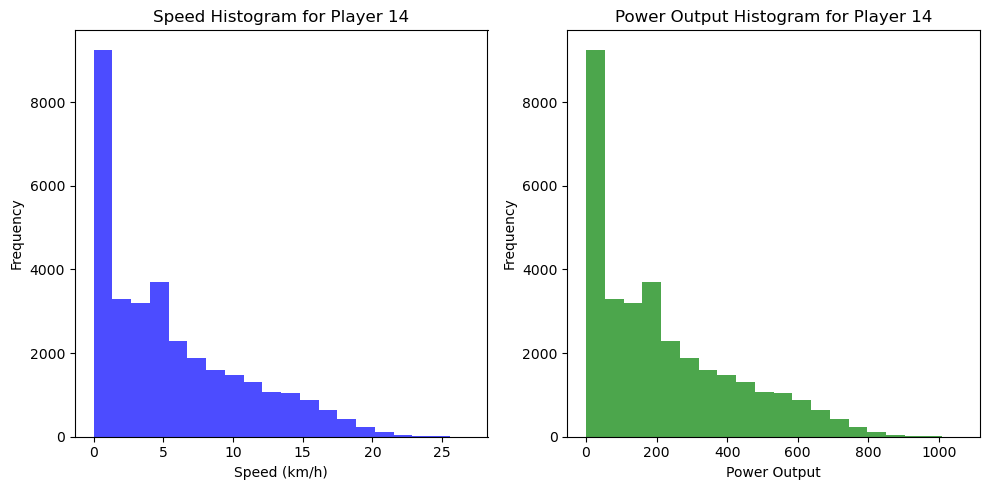

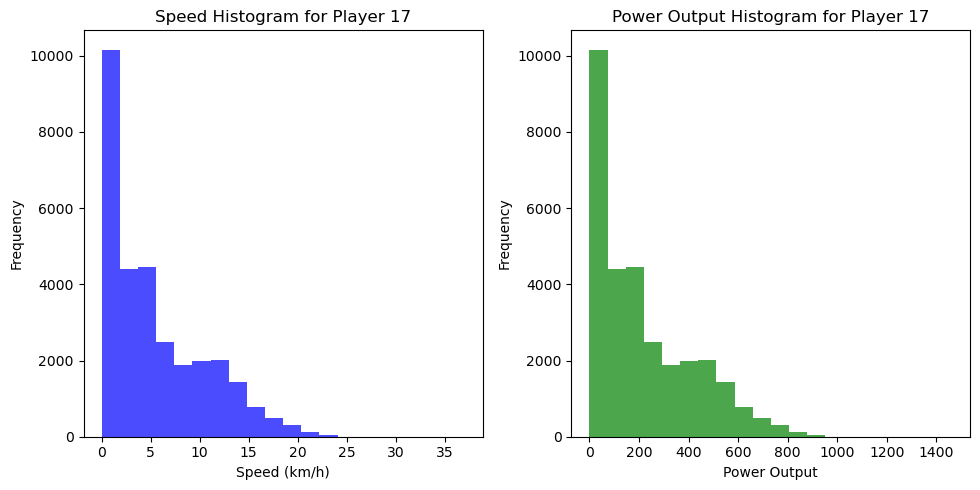

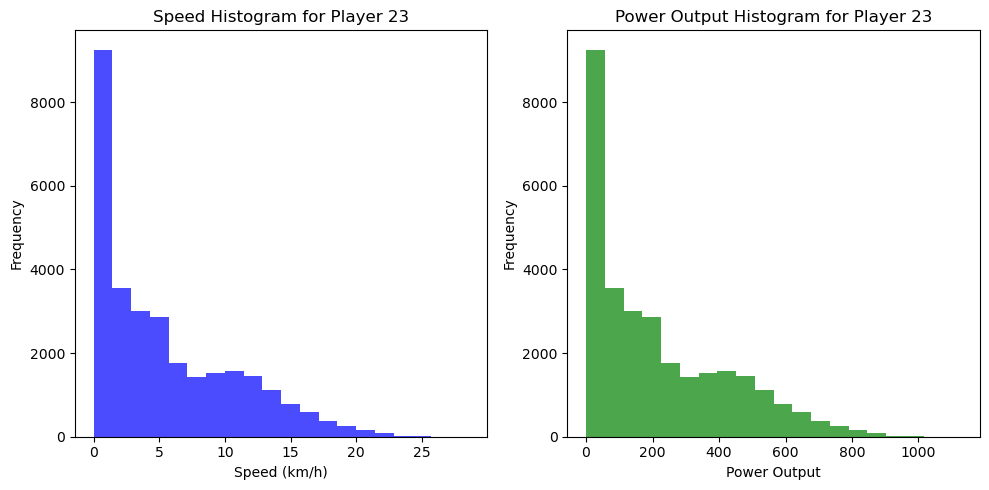

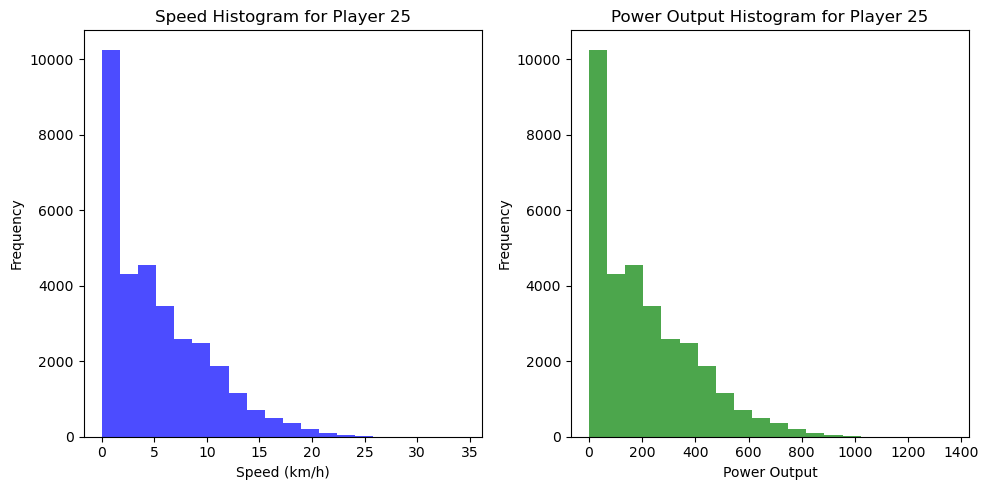

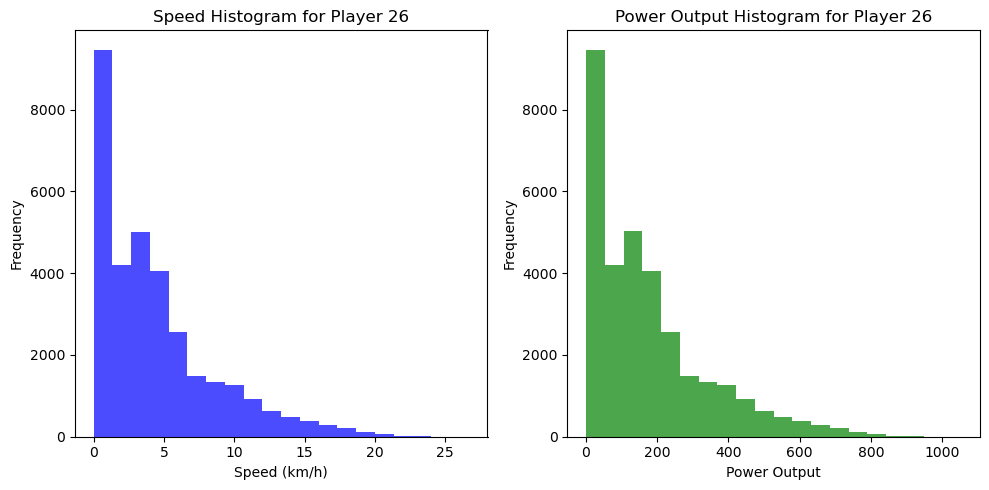

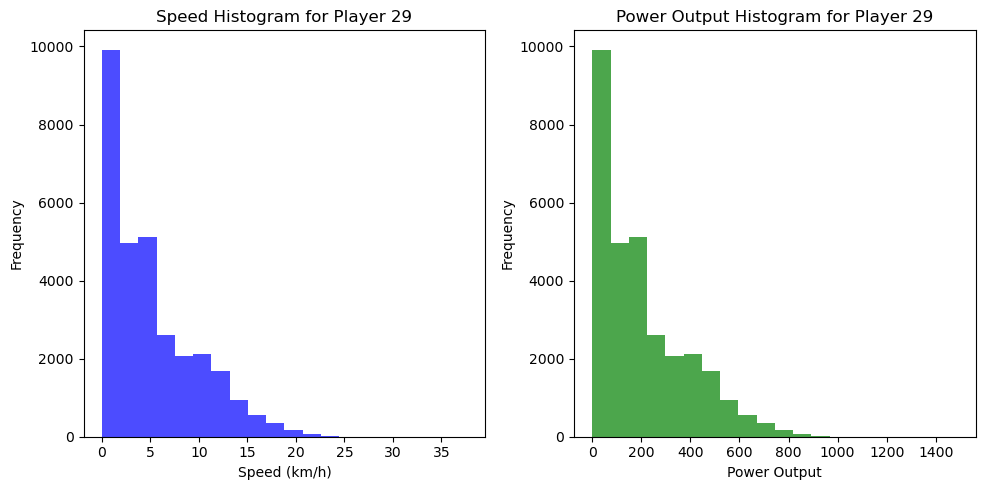

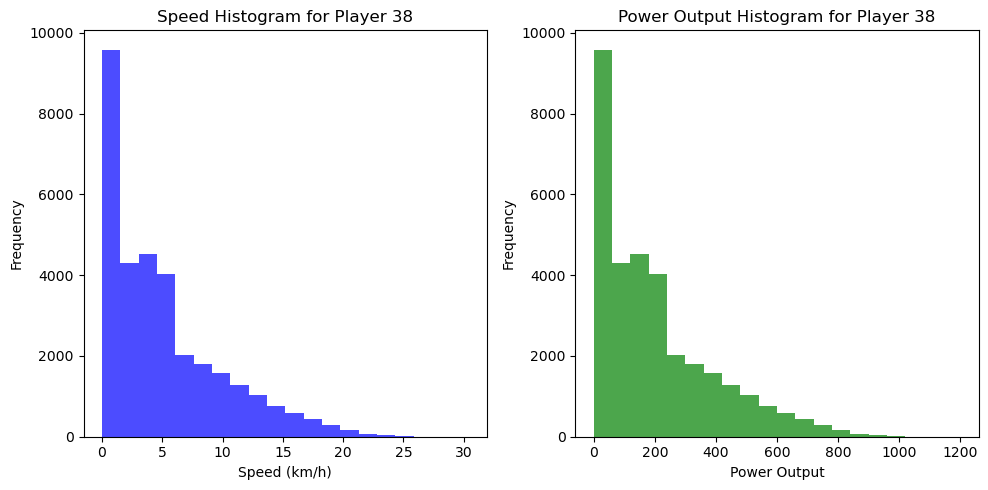

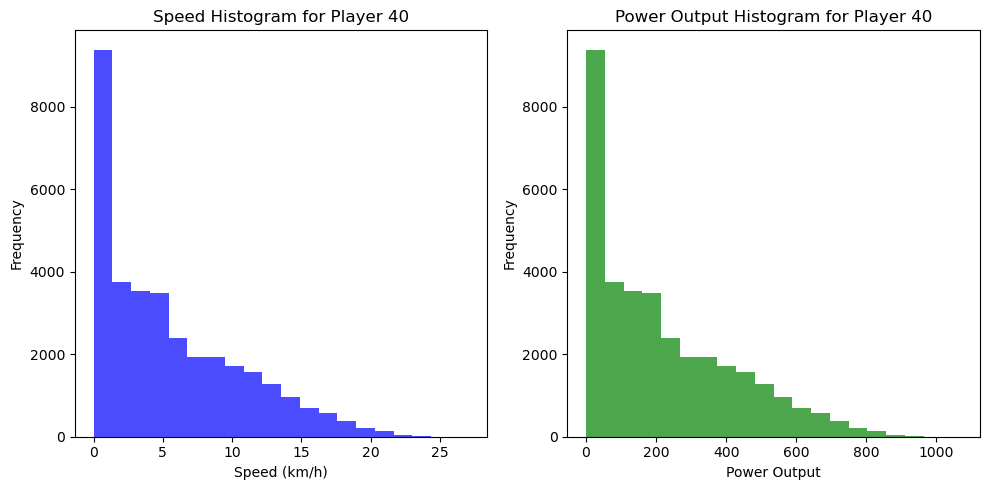

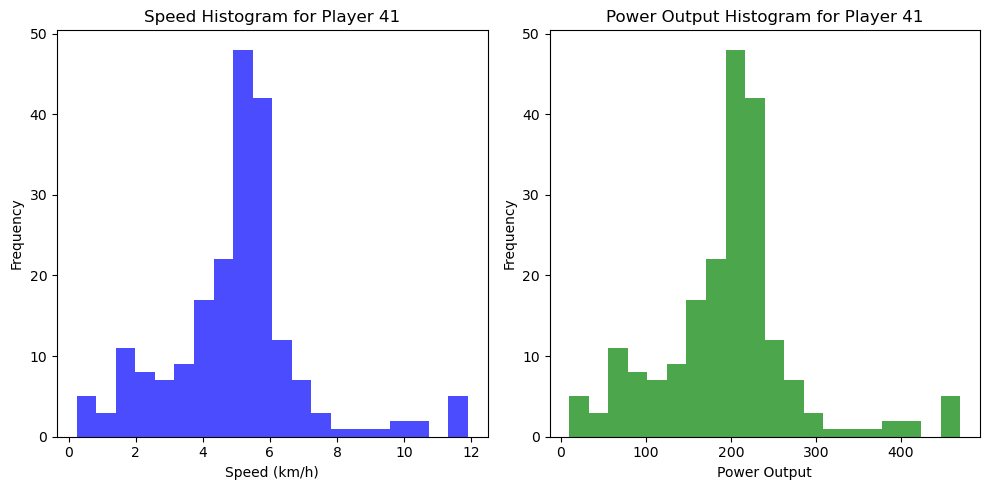

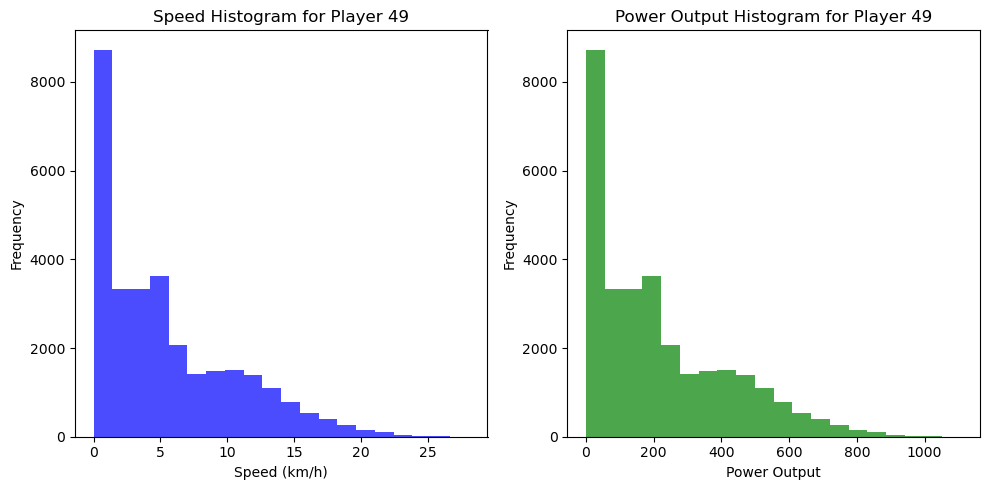

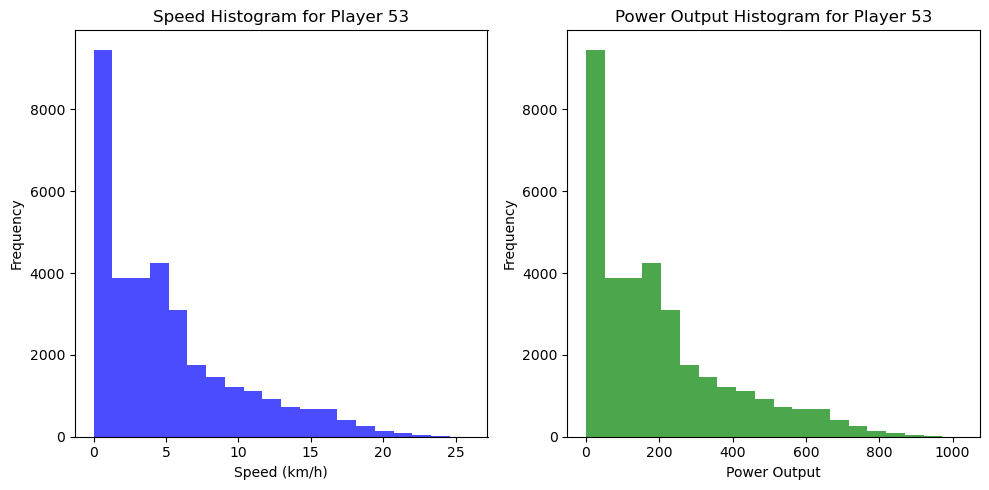

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already executed the previous code to generate merged_data

# Load the modified merged dataset
merged_data = pd.read_excel(file_path_modified_merged_excel)

# Get unique player IDs
players = merged_data['player_id'].unique()

# Plot histogram for each player
for player_id in players:
    player_data = merged_data[merged_data['player_id'] == player_id]
    plt.figure(figsize=(10, 5))
    
    # Histogram for speed
    plt.subplot(1, 2, 1)
    plt.hist(player_data['speed_soft'], bins=20, color='blue', alpha=0.7)
    plt.title(f'Speed Histogram for Player {player_id}')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Frequency')
    
    # Histogram for power output
    plt.subplot(1, 2, 2)
    plt.hist(player_data['power_output'], bins=20, color='green', alpha=0.7)
    plt.title(f'Power Output Histogram for Player {player_id}')
    plt.xlabel('Power Output')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


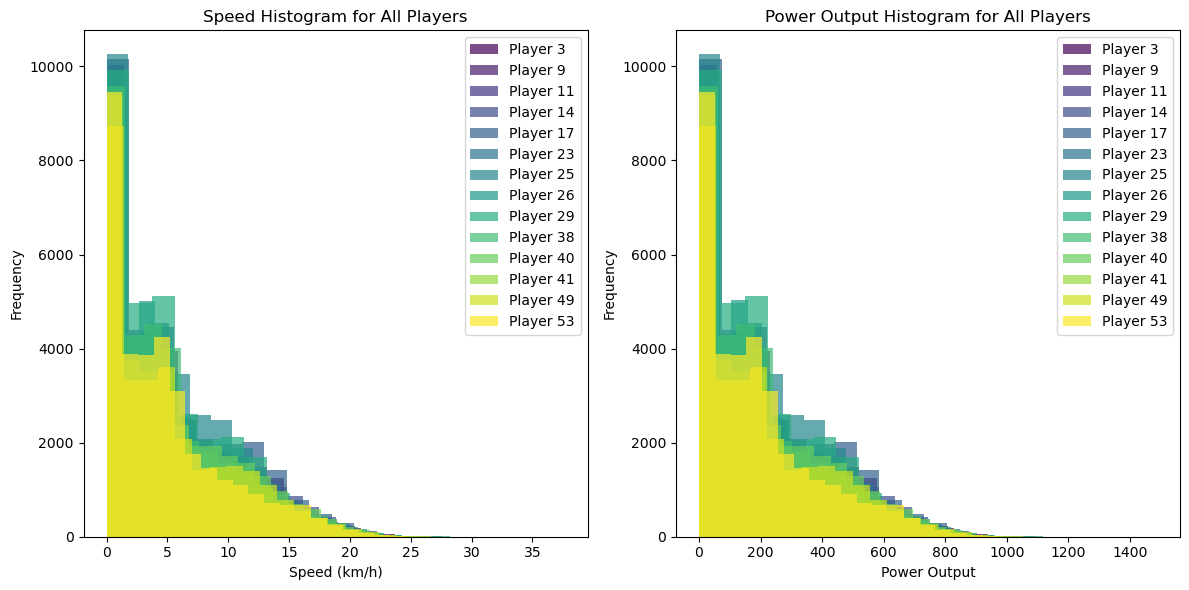

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already executed the previous code to generate merged_data

# Load the modified merged dataset
merged_data = pd.read_excel(file_path_modified_merged_excel)

plt.figure(figsize=(12, 6))

# Histogram for speed
plt.subplot(1, 2, 1)
num_players = len(merged_data['player_id'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, num_players))
for i, player_id in enumerate(merged_data['player_id'].unique()):
    player_data = merged_data[merged_data['player_id'] == player_id]
    plt.hist(player_data['speed_soft'], bins=20, color=colors[i], alpha=0.7, label=f'Player {player_id}')
plt.title('Speed Histogram for All Players')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for power output
plt.subplot(1, 2, 2)
for i, player_id in enumerate(merged_data['player_id'].unique()):
    player_data = merged_data[merged_data['player_id'] == player_id]
    plt.hist(player_data['power_output'], bins=20, color=colors[i], alpha=0.7, label=f'Player {player_id}')
plt.title('Power Output Histogram for All Players')
plt.xlabel('Power Output')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
